In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [5]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16,activation='relu'),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])


In [6]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [24]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),data_format='channels_last'),
    MaxPooling2D((3,3),data_format='channels_last'),
    Flatten(),
    Dense(10,activation='softmax')
])

In [10]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 26, 26)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 8, 8)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [26]:
# Define the model optimizer, loss function and metrics
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss ='sparse_categorical_crossentropy',
              metrics=[acc,mae])

In [14]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x760763717160>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7607637175c0>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [16]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [18]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [19]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255
test_images = test_images/255


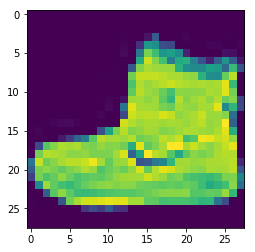

In [22]:
# Display one of the images
i=0
img= train_images[i,:,:]
plt.imshow(img)
plt.show()

#### Fit the model

In [27]:
# Fit the model

history = model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size =256,verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 50s - loss: 0.2892 - sparse_categorical_accuracy: 0.8954 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 51s - loss: 0.2839 - sparse_categorical_accuracy: 0.8983 - mean_absolute_error: 4.4200


#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)


In [ ]:
# Make a plot for the loss
loss_plot =df.plot(y="loss",title ="Loss vs. Epochs",legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss,test_accuracy,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)


#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

